In [1]:
#!/usr/bin/env python3

In [2]:
# import librarys
import pandas as pd
import subprocess
import os
from urllib.parse import urlsplit

In [3]:
# pathes
csv_original = '../data/database/db_01_original.csv'
csv_updated = '../data/database/db_02_updated.csv'
git_store = '../data/repositories/git/'

In [4]:
# read csv data
df_original = pd.read_csv(csv_original)
df_update = pd.read_csv(csv_updated)

# print shape
print(df_original.shape)
print(df_update.shape)

(537, 6)
(537, 5)


In [5]:
# clear empty rows
df_update.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)
print(len(df_update))

525


False    463
True      62
Name: Link, dtype: int64


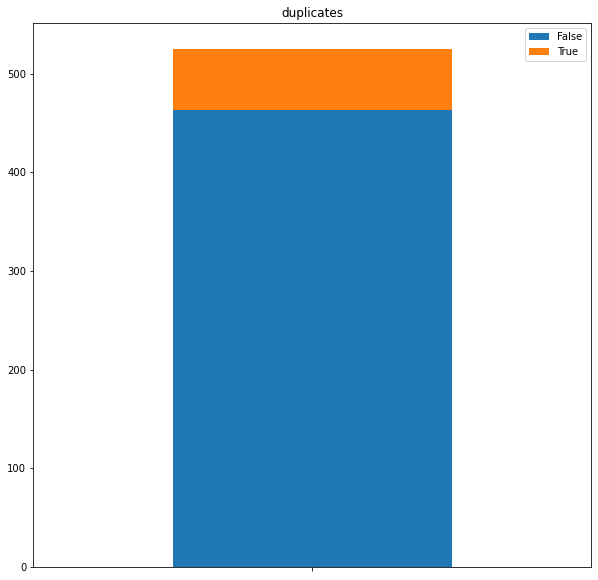

In [6]:
# diagram function for duplicates
def chart_duplicates():
    n = df_update['Link'].duplicated().value_counts()
    print(n)
    df2=pd.DataFrame([n], index=[''])
    #df2.index=[feature]
    ax = df2.plot(kind='bar', stacked=True, figsize=(10,10), title='duplicates')
    fig = ax.get_figure()
    fig.savefig('03-01_duplicates.png')
    
# create diagram by industry
#chart_feature('Link')

#print(df['Link'].value_counts())
#print(df_update['Link'].duplicated().value_counts())
chart_duplicates()

In [7]:
# add duplicates to dataframe
duplicates = df_update['Link'].duplicated()
df_update['Duplicate'] = duplicates
print(df_update.head())

               Industry  Type                       Name  \
0  Accommodation & Food  Food                  RobotChef   
1  Accommodation & Food  Food             Food Amenities   
2  Accommodation & Food  Food  Recipe Cuisine and Rating   
3  Accommodation & Food  Food        Food Classification   
4  Accommodation & Food  Food            Image to Recipe   

                                                Link  \
0              https://github.com/bschreck/robo-chef   
1  https://github.com/Ankushr785/Food-amenities-d...   
2          https://github.com/catherhuang/FP3-recipe   
3      https://github.com/stratospark/food-101-keras   
4          https://github.com/Murgio/Food-Recipe-CNN   

                                         Description  Duplicate  
0            Refining recipes based on user reviews.      False  
1  Predicting the demand for food amenities using...      False  
2  Predict the rating and type of cuisine from a ...      False  
3                         Classificati

In [8]:
# recreate base url for github-links (as in 02_git_downloader.ipynb)

from urllib.parse import urlsplit

base_url_list = []

for url in df_update['Link']:
    base_url = url
    
    # split url
    split_url = urlsplit(url)

    # check if url is a git repository
    if split_url.netloc == 'github.com':

        # url formatting
        base_url = base_url.replace('www.', '')
        base_url = base_url.replace('%20', ' ')
        base_url = base_url.split("blob",1)[0]
        base_url = base_url.split("tree",1)[0]
        
        if url != base_url:
            print(url, base_url)
            
    base_url_list.append(base_url)
    
print(len(base_url_list))

df_update['Base_URL'] = base_url_list
print(len(df_update), df_update.head())

https://github.com/TiesdeKok/Python_NLP_Tutorial/blob/master/NLP_Notebook.ipynb https://github.com/TiesdeKok/Python_NLP_Tutorial/
https://github.com/TiesdeKok/UW_Python_Camp/blob/master/Materials/Session_5/EDGAR_walkthrough.ipynb https://github.com/TiesdeKok/UW_Python_Camp/
https://github.com/danshorstein/python4cpas/blob/master/03_parsing_pdf_files/AR%20Aging%20-%20working.ipynb https://github.com/danshorstein/python4cpas/
https://github.com/surajmall/Agriculture-Assistant/tree/master/models https://github.com/surajmall/Agriculture-Assistant/
https://github.com/abuchowdhury/Mortgage_Bank_Loan_Analtsics/blob/master/Mortgage%20Bank%20Loan%20Analytics.ipynb https://github.com/abuchowdhury/Mortgage_Bank_Loan_Analtsics/
https://github.com/IBM-Cloud-DevFest-2018/Data-Science-for-Banking/blob/master/02-CreditCardApprovalModel/CreditCardApprovalModel.ipynb https://github.com/IBM-Cloud-DevFest-2018/Data-Science-for-Banking/
https://github.com/am-aditya/Artificial-Intelligence-for-Banking/blob/

In [9]:
# push data to csv
csv_new = '../data/database/db_03_cleanup.csv'
df_update.to_csv(csv_new)